C:\Users\HP\AppData\Local\Temp\ipykernel_36876\893904167.py:16: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./cleaned_data/cleaned_diabetic_data.csv')
C:\Users\HP\AppData\Local\Temp\ipykernel_36876\893904167.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
C:\Users\HP\AppData\Local\Temp\ipykernel_36876\893904167.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


readmission distribution


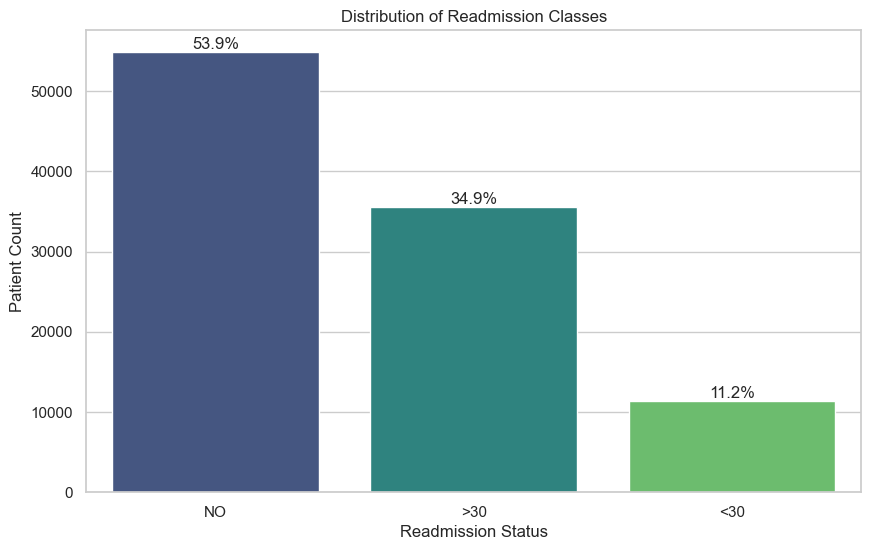

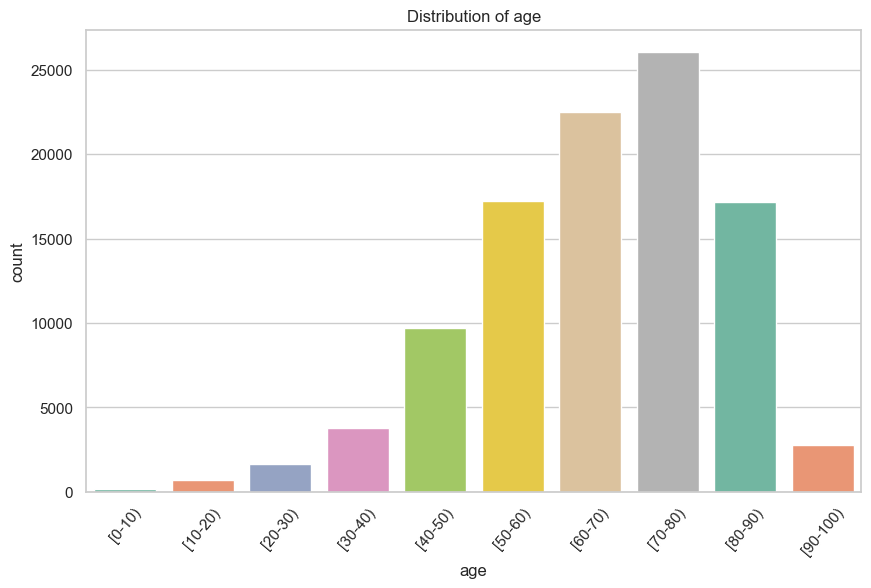

distribution of age


C:\Users\HP\AppData\Local\Temp\ipykernel_36876\893904167.py:91: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  readmission_rates = df.groupby(['race', 'gender'])['readmitted_flag'].mean().reset_index()


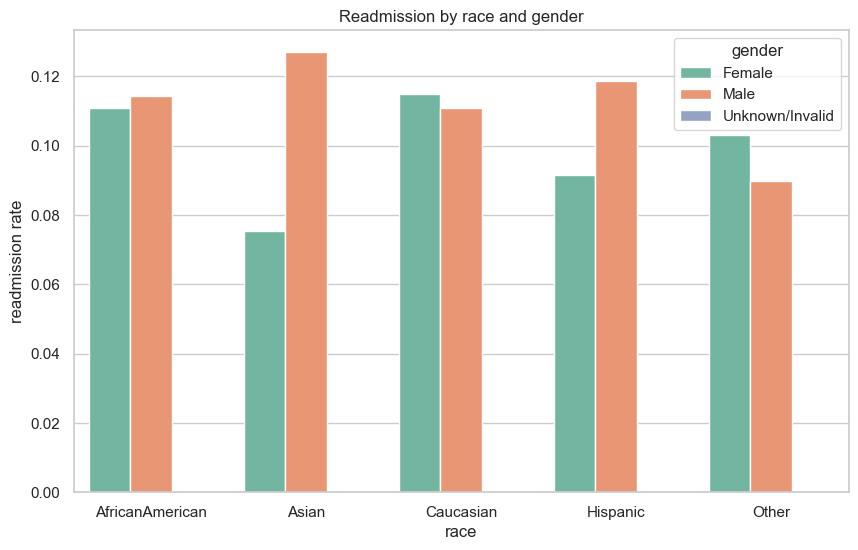

analyze readmission rates stratified by race and gender.


C:\Users\HP\AppData\Local\Temp\ipykernel_36876\893904167.py:153: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


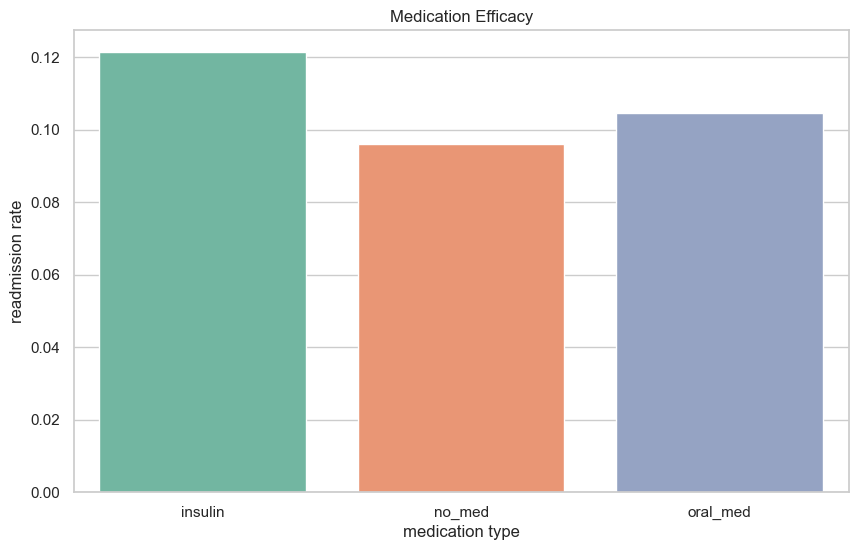

medication efficacy


C:\Users\HP\AppData\Local\Temp\ipykernel_36876\893904167.py:179: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  change_of_medication_radmission_rates = df.groupby(['change'])['readmitted_flag'].mean().reset_index()
C:\Users\HP\AppData\Local\Temp\ipykernel_36876\893904167.py:182: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


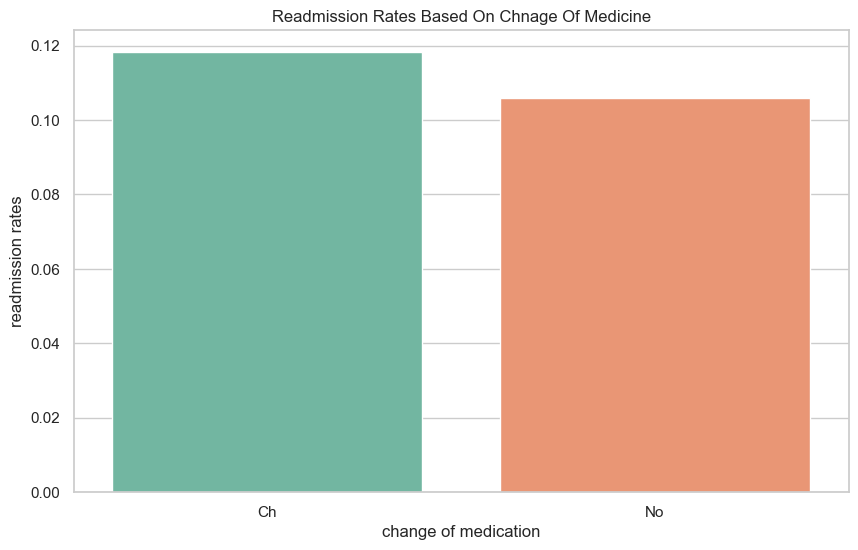

medication change analysis


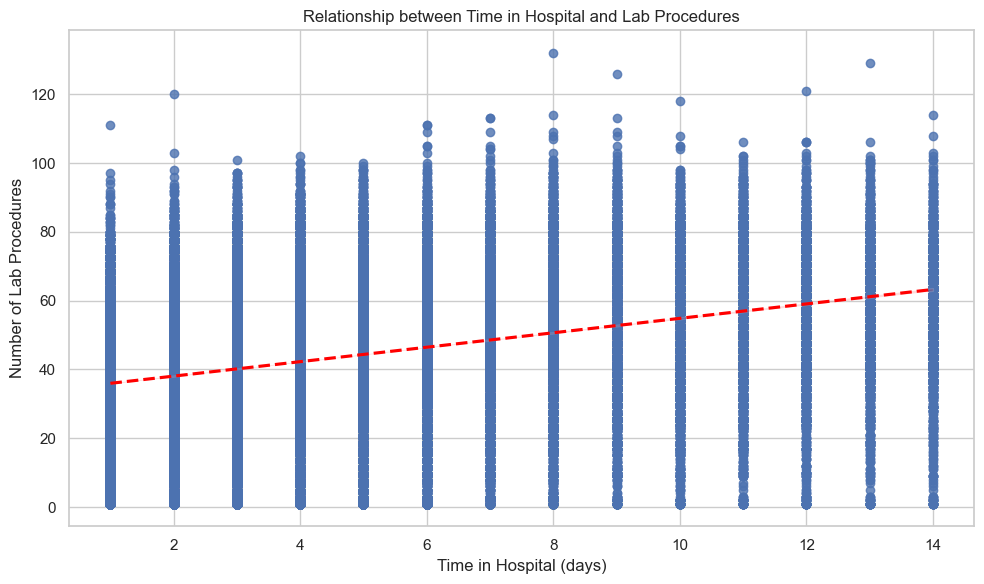

Correlation:  0.3184501687998038


<Figure size 1000x600 with 0 Axes>

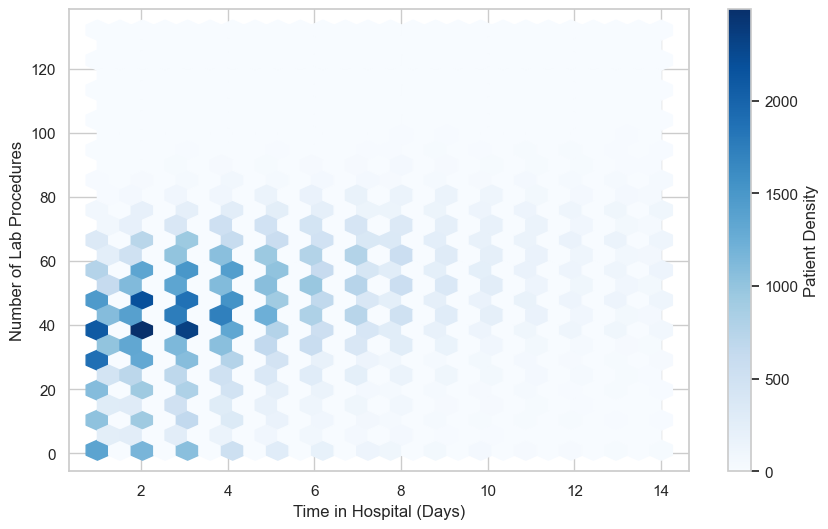

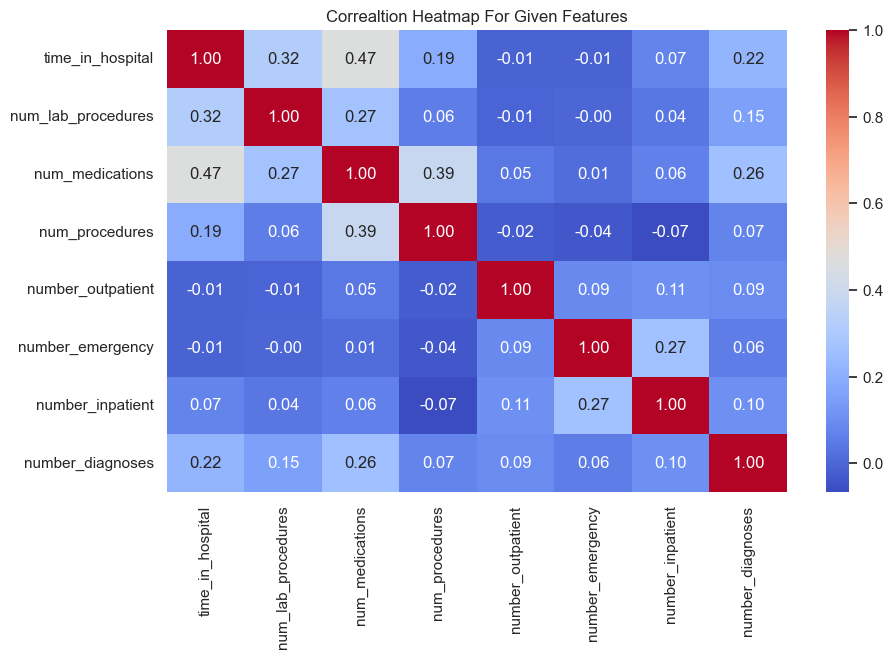

correlation heatmap


C:\Users\HP\AppData\Local\Temp\ipykernel_36876\893904167.py:300: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='readmitted', y='time_in_hospital', data=df_filtered_readmission, palette='Set2')


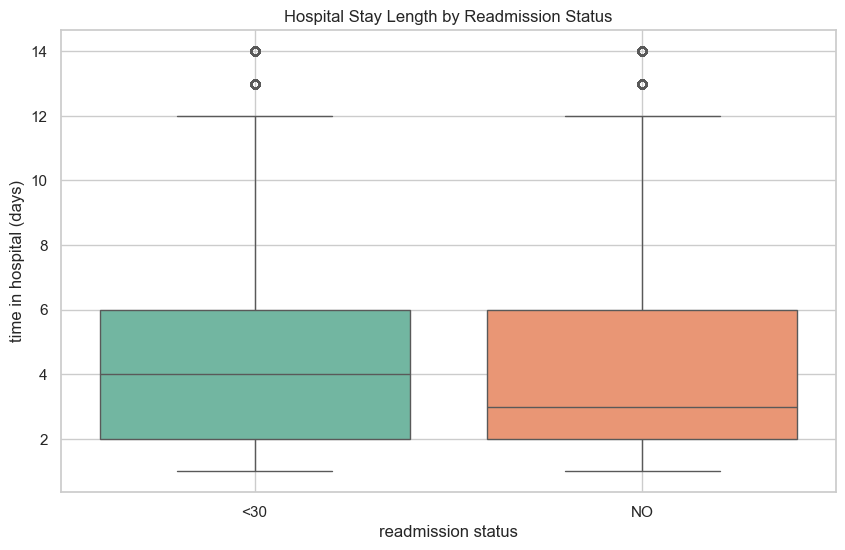

9
40


C:\Users\HP\AppData\Local\Temp\ipykernel_36876\893904167.py:349: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_home_snf['discharge_id_mappings'] = df_home_snf['discharge_id_mappings'].str.strip()
C:\Users\HP\AppData\Local\Temp\ipykernel_36876\893904167.py:350: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_home_snf['discharge_id_mappings'] = df_home_snf['discharge_id_mappings'].replace({
C:\Users\HP\AppData\Local\Temp\ipykernel_36876\893904167.py:361: FutureWarning: 

Passing `palette` without assignin

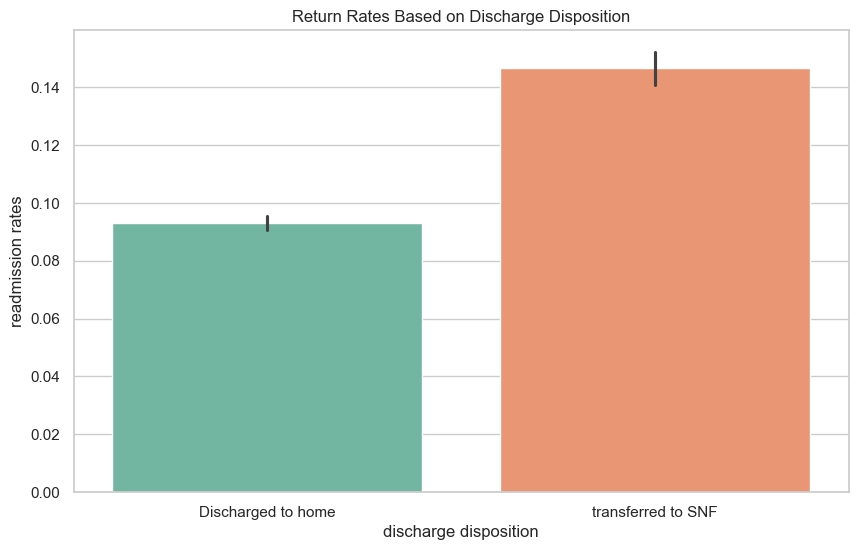

In [49]:
import pandas as pd
import requests as req
from bs4 import BeautifulSoup
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Global Visualization Settings
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

#phase 3 -1
#load data from the cleaned csv file
df = pd.read_csv('./cleaned_data/cleaned_diabetic_data.csv')



# This is not required if the data type conversion was already done -- converting object type to category
df[df.select_dtypes(include='object').columns] = df.select_dtypes(include='object').astype('category')


# This is not required if the data type conversion was already done -- converting int64 type to category
df['encounter_id'] = df['encounter_id'].astype('category')
df['patient_nbr'] = df['patient_nbr'].astype('category')
df['admission_type_id'] = df['admission_type_id'].astype('category')
df['admission_source_id'] = df['admission_source_id'].astype('category')
df['discharge_disposition_id'] = df['discharge_disposition_id'].astype('category')


# This is not required, drop the column named 'Unnamed: 0'
df.drop(columns = ['Unnamed: 0'], inplace = True)

# df.info()


# visualaizing coutplot for plahse 3 - 1
plt.figure()
ax = sns.countplot(
    x="readmitted",
    data=df,
    order=["NO", ">30", "<30"],
    palette="viridis"
)

plt.title("Distribution of Readmission Classes")
plt.xlabel("Readmission Status")
plt.ylabel("Patient Count")

for p in ax.patches:
    ax.annotate(
        f"{p.get_height() / len(df) * 100:.1f}%",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="bottom"
    )

print("readmission distribution")








# phase 3 - 2 - 1
plt.figure()

sns.countplot(
    x = 'age',
    data = df,
    palette = 'Set2'
    
    )
plt.xticks(rotation=50)
plt.title("Distribution of age")
plt.show()

print("distribution of age")


# phase 3 -2 - 2
# add a column called 'readmitted_flag' which only indicates readmissions within 30 days '<30' 
df['readmitted_flag'] = df['readmitted'].apply(lambda x: 1 if x in ['<30'] else 0) 

# use groupby , then select a column and aggregate them and then use resetindex() to make a dataframe

# another dataframe is created here to visualize readmission by and gender
readmission_rates = df.groupby(['race', 'gender'])['readmitted_flag'].mean().reset_index()

# visualizing readmission reates stratified by race and gender

sns.barplot(
    x = 'race',
    y = 'readmitted_flag',
    hue = 'gender',
    data = readmission_rates,
    palette = 'Set2'
)

plt.title('Readmission by race and gender')
plt.ylabel('readmission rate')
plt.xlabel('race')
plt.show()

print("analyze readmission rates stratified by race and gender.")

# clarification: 
# Intersectional disparity:

# If you only looked at race, you’d say Asians have high readmission.”

# If you only looked at gender, you’d say males have higher readmission.”

# But when you look at race + gender together, you see that asian males are the most affected group.

# That’s the “intersectional disparity” — outcomes differ when identities overlap.
# This shows that the overlap of race and gender reveals differences you wouldn’t see if you only looked at one factor.







#phae 3 - 3 -1
# medication Efficacy Analysis:


# creaging a list called oral_drugs_medications for extracting oral_medication columns / 22-medication
oral_drugs_medications = df.columns

# locate the starting and ending indexes
index_start = df.columns.get_loc('metformin')
index_end = df.columns.get_loc('metformin-pioglitazone')

# removing 'insulin' column 
if 'insulin' in oral_drugs_medications[index_start:index_end]:
    oral_drugs_medications = oral_drugs_medications[index_start:index_end].drop('insulin')


# creating a column to indicate if the patient is on oral drugs for diabetics (any from 22 medication)
df['on_oral_medication'] = df[oral_drugs_medications].apply(lambda row: any( val in ['Up', 'Down', 'Steady'] for val in row), axis=1)
df['medication_type'] = df.apply(lambda row: 'insulin' if row['insulin'] in ['Up', 'Down', 'Steady'] else 'oral_med' if row['on_oral_medication'] else 'no_med', axis=1) 

# creating another dataframe for visualize medication efficacy
readmission_rates_medication_efficacy = df.groupby(['medication_type'])['readmitted_flag'].mean().reset_index()

# visualizing medication efficacy:
plt.figure()
sns.barplot(
    x = 'medication_type',
    y = 'readmitted_flag',
    data = readmission_rates_medication_efficacy,
    palette = 'Set2'
)

plt.title("Medication Efficacy")
plt.xlabel("medication type")
plt.ylabel("readmission rate")
plt.show()

print("medication efficacy")







# pahse 3 - 3 - 2
# analyze the change of medication 


# creating another data frame for visualizing change of medication to readmission reates

change_of_medication_radmission_rates = df.groupby(['change'])['readmitted_flag'].mean().reset_index()
plt.figure()

sns.barplot(
    x = 'change',
    y = 'readmitted_flag',
    data = change_of_medication_radmission_rates,
    palette='Set2'
)


plt.title("Readmission Rates Based On Chnage Of Medicine")
plt.xlabel('change of medication')
plt.ylabel('readmission rates')
plt.show()

print("medication change analysis")



# Operationg matrics
# phase 3 - 4 -1 

# creating scattered plot to vizualize time in hospital and number of lab procedures
plt.figure()

sns.regplot(
    x='time_in_hospital',
    y='num_lab_procedures',
    data=df,
    scatter_kws={'alpha': 0.8},
    line_kws={'color': 'red', 'linestyle': '--'}
)

plt.xlabel('Time in Hospital (days)')
plt.ylabel('Number of Lab Procedures')
plt.title('Relationship between Time in Hospital and Lab Procedures')
plt.tight_layout()
plt.show()


# creating a hexbin figure to make the visualizing clear as scattered plot became not so clear due to overlappings (due to the size of the dataset)
plt.figure()

plt.figure()
plt.hexbin(
    df["time_in_hospital"],
    df["num_lab_procedures"],
    gridsize=25,
    cmap="Blues"
)
plt.colorbar(label="Patient Density")
plt.xlabel("Time in Hospital (Days)")
plt.ylabel("Number of Lab Procedures")


# calculating correlation
corr = df['time_in_hospital'].corr(df['num_lab_procedures'])
print("Correlation: ", corr)









# phase 3 - 4 - 2

# generating correlationg heatmap
# numerical_features list includes columns which has numerical data types
numerical_features = [
        'time_in_hospital', 
        'num_lab_procedures',
        'num_medications', 
        'num_procedures',
        'number_outpatient', 
        'number_emergency', 
        'number_inpatient', 
        'number_diagnoses'
    ]

# creagin a data frame calld numerical_fetures_df
numerical_fetures_df = df[numerical_features]

# calculating correlationg matrix
correlation_matrix = numerical_fetures_df.corr()
plt.figure()
sns.heatmap(
        correlation_matrix, 
        annot=True, 
        fmt='.2f',
        cmap='coolwarm' 
    )
plt.title('Correaltion Heatmap For Given Features')
plt.show()

print("correlation heatmap")









# phase 3 - 4 - 3
# Create box plots of time_in_hospital grouped by readmitted status


# create a data frame filtering readmissions ">30" so only includes "No" and "<30"
df_filtered_readmission = df[df['readmitted'] != ">30"].copy()
df_filtered_readmission['readmitted'] = df_filtered_readmission['readmitted'].astype('category')
df_filtered_readmission['readmitted'] = df_filtered_readmission['readmitted'].cat.remove_unused_categories()



# vizualing bloxplots
plt.figure()
sns.boxplot(x='readmitted', y='time_in_hospital', data=df_filtered_readmission, palette='Set2')
plt.title("Hospital Stay Length by Readmission Status")
plt.xlabel("readmission status")
plt.ylabel("time in hospital (days)")
plt.grid(True)
plt.show()




# phase 3 - 4 - 4


# read the mappings file and add another column to the data frame
start = 0
end = 0
discharge_id_mapping_lines = []
with open('./data_files/IDs_mapping.csv', 'r') as file:
    lines = file.readlines()

    for line in lines:
        if re.search(r"[A-Za-z0-9]", line):
            discharge_id_mapping_lines.append(line.strip('\n'))

    # print(discharge_id_mapping_lines)
    for index, line in enumerate(discharge_id_mapping_lines):
        if discharge_id_mapping_lines[index].rstrip() == 'discharge_disposition_id,description':
            start = index
            print(index)
        elif discharge_id_mapping_lines[index].rstrip() == 'admission_source_id,description':
            end = index
            print(index)
            break
# print(discharge_id_mapping_lines[start + 1:end])
# create a dictionary containning id : details. ex - '1': 'Discharged to home'
discharge_id_mappings_dict = { mapping.split(",")[0] :mapping.split(",")[1] for mapping in discharge_id_mapping_lines[start + 1: end] }
# print(discharge_id_mappings_dict)


# Add a column to df_cleaned data frame
df['discharge_id_mappings'] = df['discharge_disposition_id'].astype(str).apply(lambda disp_id: discharge_id_mappings_dict[disp_id])

# df_cleaned.head(10)
df_home_snf = df[df['discharge_id_mappings'].isin(['Discharged to home', 'Discharged/transferred to a Skilled Nursing Facility (SNF)'])]

# return_rates_dischard_disp_based = df_cleaned.groupby('discharge_id_mappings')['readmitted_flag'].mean().reset_index()
return_rates_dischard_disp_based = df_home_snf.groupby('discharge_id_mappings')['readmitted_flag'].mean().reset_index()

# make name 'Discharged/transferred to a Skilled Nursing Facility' shorter as transferred to SNF
df_home_snf['discharge_id_mappings'] = df_home_snf['discharge_id_mappings'].str.strip()
df_home_snf['discharge_id_mappings'] = df_home_snf['discharge_id_mappings'].replace({
    'Discharged/transferred to a Skilled Nursing Facility (SNF)': 'transferred to SNF'
})




# plt.figure(figsize=(12, 8))
sns.set_theme(style = "whitegrid")

plt.figure()
sns.barplot(

    x = 'discharge_id_mappings',
    y = 'readmitted_flag',
    data = df_home_snf,
    palette = 'Set2'
    
    
)

plt.title("Return Rates Based on Discharge Disposition")
plt.xlabel("discharge disposition")
# plt.xticks(rotation = 45)
plt.ylabel('readmission rates')
plt.show()



